## School SHSHAT Performance Determinants

### Research Question

What are the key factors affecting schools’ performance in SHSAT assessments?

### Introduction

The Specialized High School Admissions Test (SHSAT) is a required test for all elementary students applying to specialized high schools in New York City. New York City has nine specialized high schools, which provide more rigorous curriculums and educational resources than other public high schools in the city. According to the Department of Education, these schools are intended to support the needs of students who excel academically and artistically. Students from specialized schools in New York City are consistently admitted to the most elite universities and rank amongst the highest-performing high school students in the United States. Specialized high schools provide their students with better resources and opportunities to gain entry to the top universities, and subsequently, the top jobs, they play a critical role in shaping upward socioeconomic mobility. 

As an education received at the nine specialized high schools are therefore the most competitive and sought-after. The SHSAT is the only criterion for admissions to the eight of nine New York City Specialized High Schools Performance on SHSAT overwhelmingly determines which students are admitted to the most elite public high schools in the state. Using a 2016 panel data set that includes observations of the 1271 elementary schools registered in Department of Education in New York City, we will look at the relationship between the average proficiency on the SHSAT of schools and the location of the schools in the City, as well as the relationship between the average proficiency on the SHSAT of schools and the economic need of their students.

The outcome variable is the average SHSAT performance of each school in 2016, measured by the average ELA proficiency and average Math proficiency as provided in the dataset. The first explanatory variable I will examine is the location of each school. The variable of the geographic location of each school is particularly interesting as it can serve as an indicator for the quality of teaching and resources available for students, which can positively or negatively impact the students’ performance on the SHSAT. However, the ability to academically perform well is not simply a direct outcome of how good the quality of teaching is at school; we need to take into account that a student’s effort and performance may also hinge on other hidden factors, such as parental support and supplementary resources such as outside-of-school tutoring. The second explanatory variable I will examine is the economic need index of the school’s students, which measures the socioeconomic circumstances of a school's population. This can indicate the students’ access to educational support and resources outside of formal school setting, which can also positively or adversely impact students' SHSAT performances.

#### Importing data of Elementary Schools in New York City in 2016

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing and reading the data
data = pd.read_csv("2016 School Explorer.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Columns: 161 entries, Adjusted Grade to Grade 8 Math 4s - Economically Disadvantaged
dtypes: float64(5), int64(123), object(33)
memory usage: 1.6+ MB


In [3]:
#identifying all the variables
pd.options.display.max_seq_items = None
display(data.columns)

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)', 'City', 'Zip', 'Grades', 'Grade Low', 'Grade High',
       'Community School?', 'Economic Need Index', 'School Income Estimate',
       'Percent ELL', 'Percent Asian', 'Percent Black', 'Percent Hispanic',
       'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate',
       'Percent of Students Chronically Absent', 'Rigorous Instruction %',
       'Rigorous Instruction Rating', 'Collaborative Teachers %',
       'Collaborative Teachers Rating', 'Supportive Environment %',
       'Supportive Environment Rating', 'Effective School Leadership %',
       'Effective School Leadership Rating', 'Strong Family-Community Ties %',
       'Strong Family-Community Ties Rating', 'Trust %', 'Trust Rating',
       'Student Achievement Rating', 'Average ELA Proficiency',
       'Average Math Proficiency', 'Grad

In [4]:
data.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [5]:
#there are 1272 schools in the school dataset, 161 variables
data.shape

(1272, 161)

#### Checking for missing values for our outcome and explanatory variables

In [6]:
#checking if our outcome variable and explanatory variables have missing values
missing = data.isnull()
missing

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1268,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1269,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1270,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#seeing how many are missing values there are per column
missing_total = missing.sum().sort_values(ascending=False)
missing_total.head()


Other Location Code in LCGMS    1271
Adjusted Grade                  1270
New?                            1245
School Income Estimate           396
Student Achievement Rating        86
dtype: int64

In [9]:
missing_total[['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)', 'City', 'Zip']]

Economic Need Index         25
Average ELA Proficiency     55
Average Math Proficiency    55
Location Code                0
District                     0
Latitude                     0
Longitude                    0
Address (Full)               0
City                         0
Zip                          0
dtype: int64

Our variables of interest are: Economic Need Index, Average ELA Proficiency, Average Math Proficiency, and variables concerning Location. 

There are several schools with missing values for Average ELA Proficiency, Average ELA Math Proficiency, and Economic Need Index. Because such schools lack the information we need to answer our research question, we will omit the schools with the missing values concerning our variables of interest from our evaluation.

In [10]:
#dropping schools that have missing values with avg ELA prof, avg Math prof, and economic need index

data = data.dropna(subset=['Average ELA Proficiency', 'Average Math Proficiency', 'Economic Need Index'])

In [11]:
#checking whether our updated dataset have any missing values for our variables of interest
missing = data.isnull().sum().sort_values(ascending=False)
missing[['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)', 'City', 'Zip']]

Economic Need Index         0
Average ELA Proficiency     0
Average Math Proficiency    0
Location Code               0
District                    0
Latitude                    0
Longitude                   0
Address (Full)              0
City                        0
Zip                         0
dtype: int64

At this points, there are no more missing values for our variables of interest, and we do not need to further clean our dataset to account for missing values.

#### Data Cleaning

In [12]:
#cleaning percentages to floats 

#creating a helper function

def str_prc_to_float(x):
    "converts percentages in strings to a float decimal"
    return float(x.strip('%')) / 100

#applying function

data["Percent Asian"] = data["Percent Asian"].astype(str).apply(str_prc_to_float)
data["Percent Black"] = data["Percent Black"].astype(str).apply(str_prc_to_float)
data["Percent Hispanic"] = data["Percent Hispanic"].astype(str).apply(str_prc_to_float)
data["Percent White"] = data["Percent White"].astype(str).apply(str_prc_to_float)
data["Percent Black / Hispanic"] = data["Percent Black / Hispanic"].astype(str).apply(str_prc_to_float)
data["Rigorous Instruction %"] = data["Rigorous Instruction %"].astype(str).apply(str_prc_to_float)
data["Collaborative Teachers %"] = data["Collaborative Teachers %"].astype(str).apply(str_prc_to_float)
data["Supportive Environment %"] = data["Supportive Environment %"].astype(str).apply(str_prc_to_float)
data["Effective School Leadership %"] = data["Effective School Leadership %"].astype(str).apply(str_prc_to_float)
data["Strong Family-Community Ties %"] = data["Strong Family-Community Ties %"].astype(str).apply(str_prc_to_float)
data["Trust %"] = data["Trust %"].astype(str).apply(str_prc_to_float)
data["Student Attendance Rate"] = data["Student Attendance Rate"].astype(str).apply(str_prc_to_float)
data["Percent of Students Chronically Absent"] = data["Percent of Students Chronically Absent"].astype(str).apply(str_prc_to_float)


data['School Income Estimate'] = data['School Income Estimate'].apply(str).str.replace(',', '')
data['School Income Estimate'] = data['School Income Estimate'].apply(str).str.replace('$', '')
data['School Income Estimate'] = data['School Income Estimate'].apply(str).str.replace(' ', '')
data['School Income Estimate'] = data['School Income Estimate'].astype(str).apply(str_prc_to_float)

/var/folders/xz/7f46dqgn7631zr_snzyl0zn40000gn/T/ipykernel_14444/4160667054.py:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['School Income Estimate'] = data['School Income Estimate'].apply(str).str.replace('$', '')


In [13]:
#Percentages changed to floats
loc_data = pd.DataFrame(data.groupby(['District','City']).mean())
loc_data.head()


SED Code   Latitude  Longitude           Zip  \
District City                                                                 
1        NEW YORK          3.101001e+11  40.721398 -73.982651  10004.769231   
2        NEW YORK          3.102000e+11  40.743920 -73.984067  10037.520833   
         ROOSEVELT ISLAND  3.102000e+11  40.763969 -73.948468  10044.000000   
3        NEW YORK          3.103002e+11  40.794513 -73.964938  10025.153846   
4        NEW YORK          3.104002e+11  40.794150 -73.941331  10030.593750   

                           Economic Need Index  School Income Estimate  \
District City                                                            
1        NEW YORK                     0.682923              446.401589   
2        NEW YORK                     0.356063              949.857981   
         ROOSEVELT ISLAND             0.293000              933.880600   
3        NEW YORK                     0.573385              613.573881   
4        NEW YORK                     0.788000              317.496919   

                           Percent Asian  Percent Black  Percent Hispanic  \
District City                                                               
1        NEW YORK               0.135385       0.192308          0.511923   
2        NEW YORK               0.260833       0.084583          0.192292   
         ROOSEVELT ISLAND       0.290000       0.160000          0.140000   
3        NEW YORK               0.049487       0.364872          0.320256   
4        NEW YORK               0.044063       0.321562          0.571875   

                           Percent Black / Hispanic  ...  \
District City                                        ...   
1        NEW YORK                          0.702308  ...   
2        NEW YORK                          0.277500  ...   
         ROOSEVELT ISLAND                  0.300000  ...   
3        NEW YORK                          0.684103  ...   
4        NEW YORK                          0.893125  ...   

                           Grade 8 Math - All Students Tested  \
District City                                                   
1        NEW YORK                                   22.730769   
2        NEW YORK                                   30.104167   
         ROOSEVELT ISLAND                           18.000000   
3        NEW YORK                                   26.384615   
4        NEW YORK                                   29.312500   

                           Grade 8 Math 4s - All Students  \
District City                                               
1        NEW YORK                                2.576923   
2        NEW YORK                                7.770833   
         ROOSEVELT ISLAND                        0.000000   
3        NEW YORK                                4.307692   
4        NEW YORK                                1.843750   

                           Grade 8 Math 4s - American Indian or Alaska Native  \
District City                                                                   
1        NEW YORK                                                        0.0    
2        NEW YORK                                                        0.0    
         ROOSEVELT ISLAND                                                0.0    
3        NEW YORK                                                        0.0    
4        NEW YORK                                                        0.0    

                           Grade 8 Math 4s - Black or African American  \
District City                                                            
1        NEW YORK                                             0.076923   
2        NEW YORK                                             0.187500   
         ROOSEVELT ISLAND                                     0.000000   
3        NEW YORK                                             2.794872   
4        NEW YORK                                             0.406250   

                          

Since we have converted our numeric values into floats, we do not have to further clean and convert the types of our data.

### Summary Statistics

#### Average Proficiency and Economic Need Index 

For the purposes for summary statistics, I will combine Average ELA Proficiency and Average Math Proficiency, and organize schools based on their combined average performance in Math and English.

In [35]:
#creating a new column for the average ELA and average Math proficiency combined
data['Average ELA and Math Proficiency'] = data[['Average ELA Proficiency','Average Math Proficiency']].mean(axis=1)
data[['School Name', 'Average ELA Proficiency','Average Math Proficiency', 'Average ELA and Math Proficiency']].head()

,School Name,Average ELA Proficiency,Average Math Proficiency,Average ELA and Math Proficiency
0,P.S. 015 ROBERTO CLEMENTE,2.14,2.17,2.155
1,P.S. 019 ASHER LEVY,2.63,2.98,2.805
2,P.S. 020 ANNA SILVER,2.39,2.54,2.465
3,P.S. 034 FRANKLIN D. ROOSEVELT,2.48,2.47,2.475
4,THE STAR ACADEMY - P.S.63,2.38,2.54,2.460


In [36]:
data[['Average ELA and Math Proficiency', 'Economic Need Index']].describe()

,Average ELA and Math Proficiency,Economic Need Index
count,1217.000000,1247.000000
mean,2.601586,0.672281
std,0.410410,0.210959
min,1.895000,0.049000
25%,2.275000,0.550000
50%,2.515000,0.731000
75%,2.860000,0.841000
max,4.040000,0.957000


Here, in the summary statistics of our outcome (y) variables Average ELA Proficiency and Average Math Proficiency, and our first explanatory (x_1) variable Economic Need Index, we can see that average elementary school has the proficiency levels for English and Math of 2.6, and an average economic need index of 0.67. 

#### Average Proficiency and Location of School

In [66]:
loc_data = data.groupby(['City']).describe()
loc_data2 = loc_data[['Average ELA and Math Proficiency']]

#sorting values to show the top cities with the highest average combined proficiency levels
loc_data2.sort_values([('Average ELA and Math Proficiency', 'mean')], ascending=False)

Average ELA and Math Proficiency                      \
                                               count      mean       std   
City                                                                       
DOUGLASTON                                       1.0  3.390000       NaN   
LITTLE NECK                                      3.0  3.348333  0.145717   
BAYSIDE                                         12.0  3.302083  0.172554   
FOREST HILLS                                     5.0  3.193000  0.310898   
FLORAL PARK                                      3.0  3.188333  0.229692   
BELLEROSE                                        4.0  3.165000  0.188768   
WHITESTONE                                       5.0  3.126000  0.143239   
BROAD CHANNEL                                    1.0  3.090000       NaN   
FLUSHING                                        28.0  3.011607  0.245410   
KEW GARDENS                                      1.0  3.010000       NaN   
MIDDLE VILLAGE                                   4.0  2.970000  0.187661   
ROOSEVELT ISLAND                                 1.0  2.955000       NaN   
ASTORIA                                          6.0  2.945000  0.620613   
MASPETH                                          3.0  2.933333  0.098658   
COLLEGE POINT                                    2.0  2.902500  0.314663   
REGO PARK                                        6.0  2.895000  0.223942   
HOWARD BEACH                                     3.0  2.891667  0.090875   
GLENDALE                                         4.0  2.875000  0.314828   
ELMHURST                                         7.0  2.854286  0.186959   
WOODSIDE                                         7.0  2.814286  0.244582   
ROCKAWAY PARK                                    5.0  2.814000  0.617185   
LONG ISLAND CITY                                21.0  2.800238  0.412579   
WOODHAVEN                                        3.0  2.760000  0.175855   
RICHMOND HILL                                    7.0  2.760000  0.173445   
JACKSON HEIGHTS                                  8.0  2.751250  0.206341   
QUEENS VILLAGE                                   6.0  2.736667  0.196994   
STATEN ISLAND                                   60.0  2.722083  0.326516   
NEW YORK                                       220.0  2.707795  0.516989   
OZONE PARK                                       6.0  2.695833  0.064064   
EAST ELMHURST                                    3.0  2.680000  0.342089   
SOUTH OZONE PARK                                10.0  2.670500  0.234633   
CAMBRIA HEIGHTS                                  2.0  2.657500  0.434871   
SOUTH RICHMOND HILL                              1.0  2.650000       NaN   
RIDGEWOOD                                        7.0  2.619286  0.243506   
JAMAICA                                         31.0  2.578710  0.319851   
BROOKLYN                                       394.0  2.563020  0.376640   
SAINT ALBANS                                     5.0  2.467000  0.220074   
CORONA                                           8.0  2.446250  0.127132   
HOLLIS                                           4.0  2.425000  0.107781   
ROSEDALE                                         4.0  2.421250  0.196527   
SPRINGFIELD GARDENS                             10.0  2.407000  0.190543   
BRONX                                          280.0  2.383036  0.286281   
FAR ROCKAWAY                                    13.0  2.324615  0.226784   
ARVERNE                                          2.0  2.302500  0.413657   
ROCKAWAY BEACH                                   1.0  2.120000       NaN   

                                                             
                       min      25%     50%      75%    max  
City                                                         
DOUGLASTON           3.390  3.39000  3.3900  3.39000  3.390  
LITTLE NECK          3.185  3.29000  3.3950  3.43000  3.465  
BAYSIDE              3.010  3.20250  3.3000  3.35250  3.640  

Here, in the summary statistics of our outcome variable (y) Average ELA Proficiency and Average Math Proficiency, and our second explanatory variable (x_2) Economic Need Index, we can see the cities with the top average combined ELA and Math proficiency scores. However, it is important to note that there is a large discrepancy between the number of schools within each city (as denoted by the column count). New York City and the Bronx both has over 200+ schools, while the cities that ranked in the top 10 of the highest average combined proficiency levels have 12 or less schools.

### Histogram of Outcome Variable 

Text(0.5, 0, 'Average SHSAT Proficiency Levels')

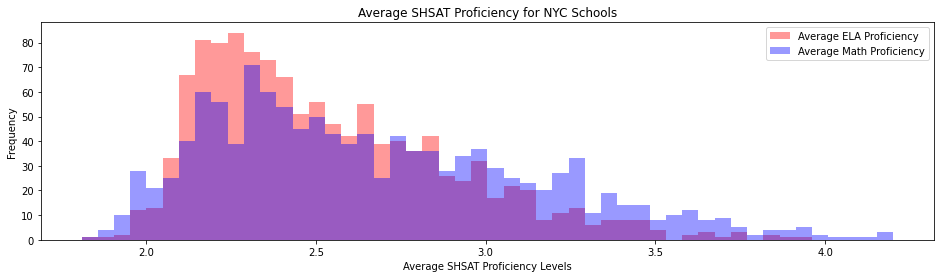

In [74]:
#creating a dataframe with just the proficiency variables
data_p = data[['Average ELA Proficiency', 'Average Math Proficiency']]

#creating a histogram
fig,ax = plt.subplots(figsize=(16,4))
data_p.plot.hist(bins=50,ax=ax, alpha=0.4, #making the colour value lower
           color=['r','b'], 
           title='Average SHSAT Proficiency for NYC Schools')
ax.set_xlabel('Average SHSAT Proficiency Levels')

### Graphs of Explanatory Variables

#### Histogram of Economic Need Index

Text(0.5, 0, 'Economic Need Index')

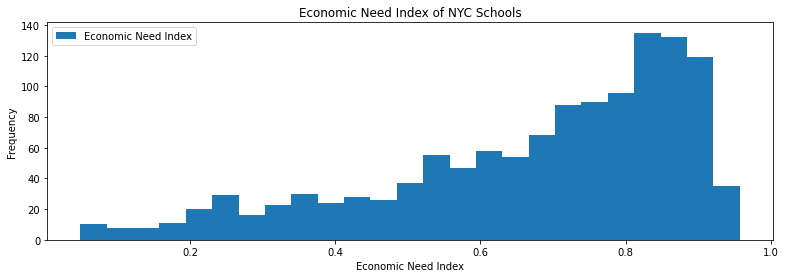

In [71]:
data_e = data[['Economic Need Index']]

fig,ax = plt.subplots(figsize=(13,4))
data_e.plot.hist(bins=25,ax=ax, title='Economic Need Index of NYC Schools')
ax.set_xlabel('Economic Need Index')

As we see above, most elementary schools in New York City have a student population that has a high economic need, as most schools are concentrated in economic need index evels of 0.6 to 0.10. We see a clear trend of a decrease in the number of schools as we move leftward towards a lower economic need index. This pattern of distribution makes sense as it approximately reflects the household income distribution in New York City. The majority of New York City household annual incomes are $60,000 or below, and fewer and fewer households earning incomes of $60,00-$100,000 bracket, and a small minority of households earning incomes of $100,000 and more. 

#### Groupby Table and Boxplot of Locations of School 

In [134]:
#creating a table counting the number of schools per city
gb_data = data.groupby(['City'])
schools_per_city = gb_data['School Name'].count().sort_values(ascending=False).reset_index().set_index('City')
schools_per_city.rename(columns={'School Name':'Number of Schools'}, inplace=True)
schools_per_city.head(20)

,Number of Schools
City,
BROOKLYN,411
BRONX,297
NEW YORK,232
STATEN ISLAND,60
JAMAICA,32
FLUSHING,30
LONG ISLAND CITY,21
BAYSIDE,13
FAR ROCKAWAY,13


There are three clear outliers: Brooklyn has 411 schools, Bronx has 297 schools, and New York has 232 schools. There are four other datapoints that may be considered as outliers: Staten Island, Jamaica, Flushing, and Long Island City. These four cities have over 20 elementary schools, which the rest of the cities in New York City do not.

To get a better visualization of the lower quartile, median, upper quartiles, we will look at the boxplot with cities under 20 schools. 

([<matplotlib.axis.YTick at 0x7fcda40c4eb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

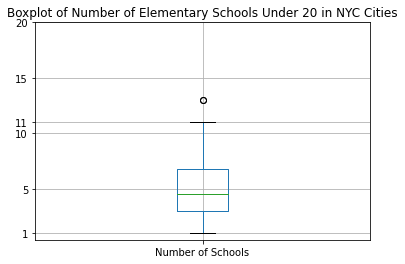

In [140]:
#creating a boxplot
under_20 = schools_per_city <= 20
schools_per_city[under_20].boxplot()
plt.title('Boxplot of Number of Elementary Schools Under 20 in NYC Cities') 
plt.yticks([1, 5, 10, 11, 15, 20])

The boxplot informs us that excluding cities with over 20 elementary schools, we observe that the school in the 50th percentile has around 5 schools and the local maximum for the number of elementary schools in a NYC city is 11. 

### Scatterplot of y, x_1, and x_2 variables

#### Economic Need Index vs SHSAT Proficiency

Text(0.5, 1.0, 'Scatterplot of New York City Elementary School Economic Need Index vs Average ELA/Math Proficiency')

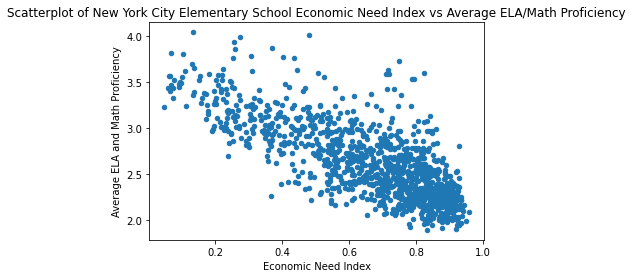

In [169]:
#creating a scatterplot
data.plot.scatter(x='Economic Need Index', y='Average ELA and Math Proficiency')
plt.title('Scatterplot of New York City Elementary School Economic Need Index vs Average ELA/Math Proficiency')
 

#### Location of School vs SHSAT Proficiency

Text(0.5, 0, 'Average ELA/Math Proficiency Level')

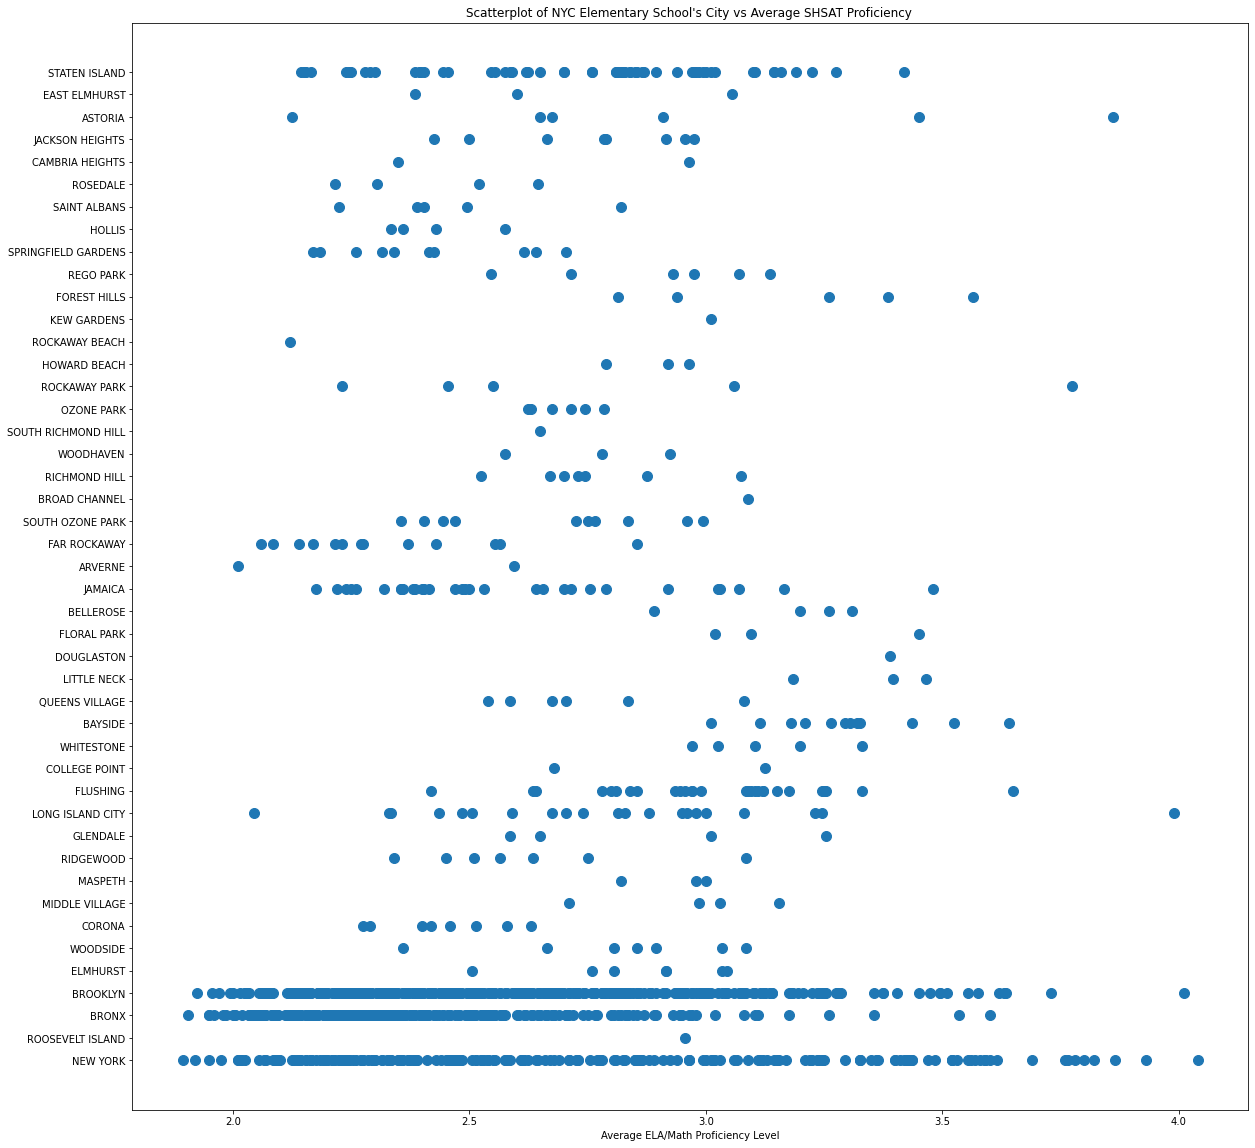

In [170]:
#creating a scatterplot
plt.figure(figsize=(20,20))
plt.scatter(x=data['Average ELA and Math Proficiency'], y=data['City'], s=100)
plt.title("Scatterplot of NYC Elementary School's City vs Average SHSAT Proficiency ")
plt.xlabel('Average ELA/Math Proficiency Level')

Above, we have used a scatterplot to observe the relationship between the city in which the school is located and the average ELA/Math proficiency levels of the school. However, there doesn't seem to be clear corrleation that appears between city and average SHSAT proficiency levels. However, given that certain cities are exponentially larger in size compared to other cities, and schools within large may be geographically separated, we may be able to find a more meaningful relationship between location and average SHSAT proficiency levels whilst incorporating using another form of data visualization. 

### Summary

In sum, we have examined two factors that may determine a school's average SHSAT proficiency levels. Thus far, we are not able to draw any conclusions to the relationship between the location of the school and the school's average SHSAT proficiency levels. However, there seems negative relationship between the school's SHSAT proficiency and the economic need of the school's student population. 

#### Future Steps

To further examine the factors that determine a school's average performance in the SHSAT, we should examine more closely the location, particularly utlizing the other variables available to denote geographic location other city.